In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup


In [3]:
url = 'https://www.hubertiming.com/results/2017GPTR'
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html,'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
title = soup.title.get_text()
print(title)

Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!


In [6]:
# print all the links
all_links = soup.find_all('a')
for link in all_links:
    print(link.get('href'))
    

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR10K
/results/summary/2017GPTR
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [8]:
# finding table
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>5K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>1458</td>
</tr>, <tr>
<td>Male:</td>
<td>771</td>
</tr>, <tr>
<td>Female:</td>
<td>687</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gun Time</th>
</tr>, <tr data-bib="2320">
<td>1</td>
<td>2320</td>
<td>

                    DANIEL M HINCKLEY

                </td>
<td>M</td>
<td>HILLSBORO</td>
<td>OR</td>
<td>16:42</td>
<td>5:23</td>
<td>16:44</td>
</tr>, <tr data-bib="2335">
<td>2</td>
<td>2335</td>
<td>

                    KORY F GRAY

                </td>
<td>M</td>
<td>HILLSBORO</td>
<td>OR</td>
<td>17:34</td>
<td>5:40</td>
<td>17:35</td>
</tr>, <tr data-bib="1770">
<td>3</td>
<td>1770</td>
<td>

                    FILIP SCHMOLE

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>18:13</td>
<td>5:52</td>
<td>18:14</td>
</tr>, <tr data-bib="2584">
<td>4</td>
<td>2584</td>
<td>

       

In [9]:
#get text of row
list_row = []
for row in rows:
    row_td = row.find_all('td')
    str_cells = str(row_td).replace('\r\n\r\n','')
    row_text = BeautifulSoup(str_cells, 'lxml').get_text()
    list_row.append(row_text)

In [10]:
df = pd.DataFrame(list_row)
df.head(20)

,0
0,[]
1,"[Finishers:, 1458]"
2,"[Male:, 771]"
3,"[Female:, 687]"
4,[]
5,"[1, 2320, DANIEL M HINCKLE..."
6,"[2, 2335, KORY F GRAY ..."
7,"[3, 1770, FILIP SCHMOLE ..."
8,"[4, 2584, TRENTON C ROLLIN..."
9,"[5, 2688, YEAN-AN LIAO ..."


### Data Manipulation And Cleaning


In [11]:
#splitting col-0
df1 = df[0].str.split(',', expand= True)
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,1458],None,None,None,None,None,None,None
2,[Male:,771],None,None,None,None,None,None,None
3,[Female:,687],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,2320,DANIEL M HINCKLEY ...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,[2,2335,KORY F GRAY,M,HILLSBORO,OR,17:34,5:40,17:35]
7,[3,1770,FILIP SCHMOLE ...,M,PORTLAND,OR,18:13,5:52,18:14]
8,[4,2584,TRENTON C ROLLING ...,M,PORTLAND,OR,18:32,5:58,18:35]
9,[5,2688,YEAN-AN LIAO,M,HILLSBORO,OR,19:12,6:11,19:18]


##### col names are 0,1,2, replacing them with actual col names

In [12]:
col_labels = soup.find_all('th')
print(col_labels)

[<th>Place</th>, <th>Bib</th>, <th>Name</th>, <th>Gender</th>, <th>City</th>, <th>State</th>, <th>Chip Time</th>, <th>Chip Pace</th>, <th>Gun Time</th>]


In [13]:
#converting col lables to string to get text
list_col = []
col_str = str(col_labels)
col_text = BeautifulSoup(col_str, 'lxml').get_text()
list_col.append(col_text)
print(list_col)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time]']


In [14]:
#convert col_text to DF
df2 = pd.DataFrame(list_col)
df2.head(20)

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [15]:
# separating col-0 with comma
df3 = df2[0].str.split(',', expand = True)
df3.head()

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]


In [16]:
#combining dfs
frames = [df3, df1]
df4 = pd.concat(frames)  # concat is used to combine 2 dfs
df4.head(20)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,1458],None,None,None,None,None,None,None
2,[Male:,771],None,None,None,None,None,None,None
3,[Female:,687],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,2320,DANIEL M HINCKLEY ...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,[2,2335,KORY F GRAY,M,HILLSBORO,OR,17:34,5:40,17:35]
7,[3,1770,FILIP SCHMOLE ...,M,PORTLAND,OR,18:13,5:52,18:14]
8,[4,2584,TRENTON C ROLLING ...,M,PORTLAND,OR,18:32,5:58,18:35]


In [17]:
# set row 1 to header of df4
df5 = df4.rename(columns=df4.iloc[0])
df5.head(10)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,1458],None,None,None,None,None,None,None
2,[Male:,771],None,None,None,None,None,None,None
3,[Female:,687],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,2320,DANIEL M HINCKLEY ...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,[2,2335,KORY F GRAY,M,HILLSBORO,OR,17:34,5:40,17:35]
7,[3,1770,FILIP SCHMOLE ...,M,PORTLAND,OR,18:13,5:52,18:14]
8,[4,2584,TRENTON C ROLLING ...,M,PORTLAND,OR,18:32,5:58,18:35]


In [18]:
# dropping missing values
df6 = df5.dropna(axis= 0, how='any')
df6.head(10)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]
5,[1,2320,DANIEL M HINCKLEY ...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,[2,2335,KORY F GRAY,M,HILLSBORO,OR,17:34,5:40,17:35]
7,[3,1770,FILIP SCHMOLE ...,M,PORTLAND,OR,18:13,5:52,18:14]
8,[4,2584,TRENTON C ROLLING ...,M,PORTLAND,OR,18:32,5:58,18:35]
9,[5,2688,YEAN-AN LIAO,M,HILLSBORO,OR,19:12,6:11,19:18]
10,[6,1576,JORGE1 LOPEZ,M,PORTLAND,OR,19:19,6:14,19:20]
11,[7,1479,SCOTT E HAMPSHIRE ...,M,HILLSBORO,OR,19:27,6:16,19:29]
12,[8,895,KEVIN CANADA,M,BEAVERTON,OR,19:53,6:24,20:02]
13,[9,2631,SCOTT GERWIG,M,PORTLAND,OR,19:57,6:26,19:59]


In [19]:
# DROP row 0
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]
5,[1,2320,DANIEL M HINCKLEY ...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,[2,2335,KORY F GRAY,M,HILLSBORO,OR,17:34,5:40,17:35]
7,[3,1770,FILIP SCHMOLE ...,M,PORTLAND,OR,18:13,5:52,18:14]
8,[4,2584,TRENTON C ROLLING ...,M,PORTLAND,OR,18:32,5:58,18:35]
9,[5,2688,YEAN-AN LIAO,M,HILLSBORO,OR,19:12,6:11,19:18]


In [20]:
# relace [Place with Place and Gun Time] with Gun Time
df7.rename(columns={'[Place': 'Place'}, inplace=True)
df7.rename(columns={' Gun Time]':'Gun Time'}, inplace=True)
df7.head()


,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time
5,[1,2320,DANIEL M HINCKLEY ...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,[2,2335,KORY F GRAY,M,HILLSBORO,OR,17:34,5:40,17:35]
7,[3,1770,FILIP SCHMOLE ...,M,PORTLAND,OR,18:13,5:52,18:14]
8,[4,2584,TRENTON C ROLLING ...,M,PORTLAND,OR,18:32,5:58,18:35]
9,[5,2688,YEAN-AN LIAO,M,HILLSBORO,OR,19:12,6:11,19:18]


In [21]:
# cleaning [ and ] from data
df7['Place'] = df7['Place'].str.strip('[')
df7['Gun Time'] = df7['Gun Time'].str.strip(']')
df7.head(30)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time
5,1,2320,DANIEL M HINCKLEY ...,M,HILLSBORO,OR,16:42,5:23,16:44
6,2,2335,KORY F GRAY,M,HILLSBORO,OR,17:34,5:40,17:35
7,3,1770,FILIP SCHMOLE ...,M,PORTLAND,OR,18:13,5:52,18:14
8,4,2584,TRENTON C ROLLING ...,M,PORTLAND,OR,18:32,5:58,18:35
9,5,2688,YEAN-AN LIAO,M,HILLSBORO,OR,19:12,6:11,19:18
10,6,1576,JORGE1 LOPEZ,M,PORTLAND,OR,19:19,6:14,19:20
11,7,1479,SCOTT E HAMPSHIRE ...,M,HILLSBORO,OR,19:27,6:16,19:29
12,8,895,KEVIN CANADA,M,BEAVERTON,OR,19:53,6:24,20:02
13,9,2631,SCOTT GERWIG,M,PORTLAND,OR,19:57,6:26,19:59
14,10,2431,NICOLAUS L ROCK ...,M,HILLSBORO,OR,20:00,6:27,20:01


### Data Ananysis and Visualization

#### Finding average finish time in minutes

In [22]:
time_list = df7[' Chip Time'].str.split(':')
time_mins = []
for i in time_list:
    h,m,s = 0,0,0
    ele_len = len(i)
    if ele_len == 2:
        m = i[0]
        s = i[1]
    else:
        h = i[0]
        m = i[1]
        s = i[2]
    math = (int(h)*3600 + int(m)*60 + int(s))/60
    time_mins.append(math)
#print(time_mins)

In [23]:
# adding a new col Running_mins
df7['Running_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Running_mins
5,1,2320,DANIEL M HINCKLEY ...,M,HILLSBORO,OR,16:42,5:23,16:44,16.700000
6,2,2335,KORY F GRAY,M,HILLSBORO,OR,17:34,5:40,17:35,17.566667
7,3,1770,FILIP SCHMOLE ...,M,PORTLAND,OR,18:13,5:52,18:14,18.216667
8,4,2584,TRENTON C ROLLING ...,M,PORTLAND,OR,18:32,5:58,18:35,18.533333
9,5,2688,YEAN-AN LIAO,M,HILLSBORO,OR,19:12,6:11,19:18,19.200000


In [24]:
# calculate summary statics for only numeric columns
df7.describe(include = [np.number])

,Running_mins
count,1458.000000
mean,39.230476
std,11.948054
min,16.700000
25%,30.120833
50%,36.758333
75%,46.829167
max,108.216667


In [25]:
# plotting box plot
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5


([<matplotlib.axis.XTick at 0x11512b9d8e0>], [Text(1, 0, 'Runners')])

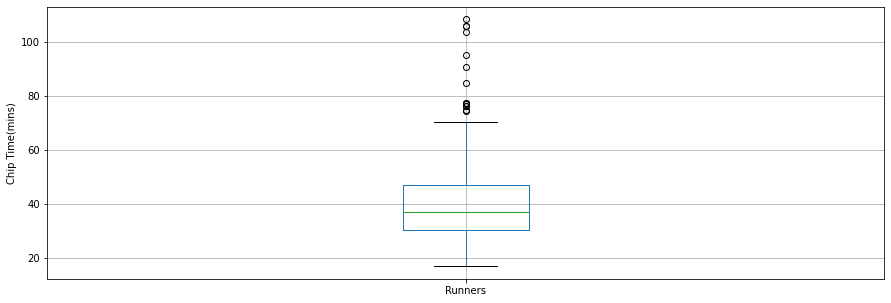

In [26]:
df7.boxplot(column='Running_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time(mins)')
plt.xticks([1],['Runners'])

#### Did runners finish times follow a normal distribution?

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


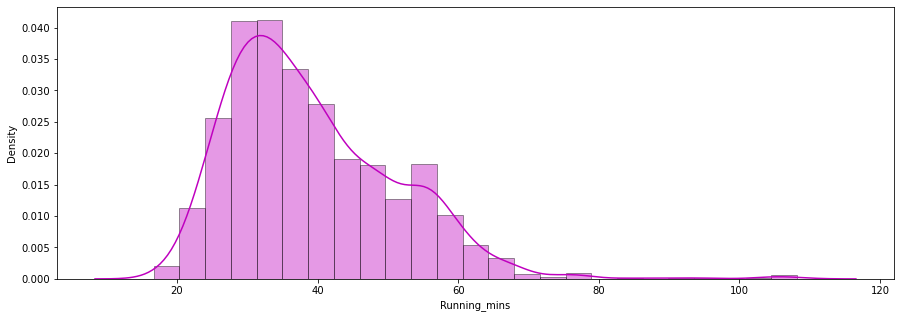

In [27]:
x = df7['Running_mins']
ax = sns.distplot(x, hist=True, kde= True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

#### Whether there were performance diffrenece between males and females of various age groups

In [28]:
#female = df7.loc[df7[' Gender'] == 'F']['Running_mins']
#male = df7.loc[df7[' Gender'] == 'M']['Running_mins']
#sns.distplot(female, hist=True, kde= True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
#sns.distplot(male, hist=True, kde= True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
#plt.legend()

g_stats = df7.groupby(' Gender', as_index=True).describe()
print(g_stats)

        Running_mins                                                    \
               count       mean        std   min        25%        50%   
 Gender                                                                  
 F             687.0  43.238913  11.943987  21.8  34.458333  41.300000   
 M             771.0  35.658755  10.766549  16.7  28.225000  33.066667   

                                
               75%         max  
 Gender                         
 F       50.633333  108.216667  
 M       40.608333  105.666667  


#### avg time taken by males is less than females ie males are faster

Text(0.5, 0.98, '')

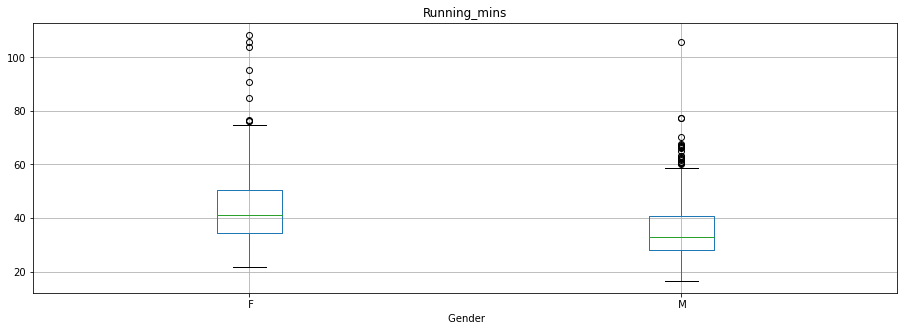

In [29]:
# printing box plot running times of males and females 
df7.boxplot(column='Running_mins', by=' Gender')
plt.ylabel = ('Chip Time')
plt.suptitle("")